In [30]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Preview data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [31]:
# Step 2: Handle missing values
# Fill numeric missing values with mean or median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop columns with too many missing values or not useful
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

# Fill categorical missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-31-33c004f23f8b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-31-33c004f23f8b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [32]:
# Step 3: Convert categorical to numerical using encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [33]:
# Step 4: Normalize/Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

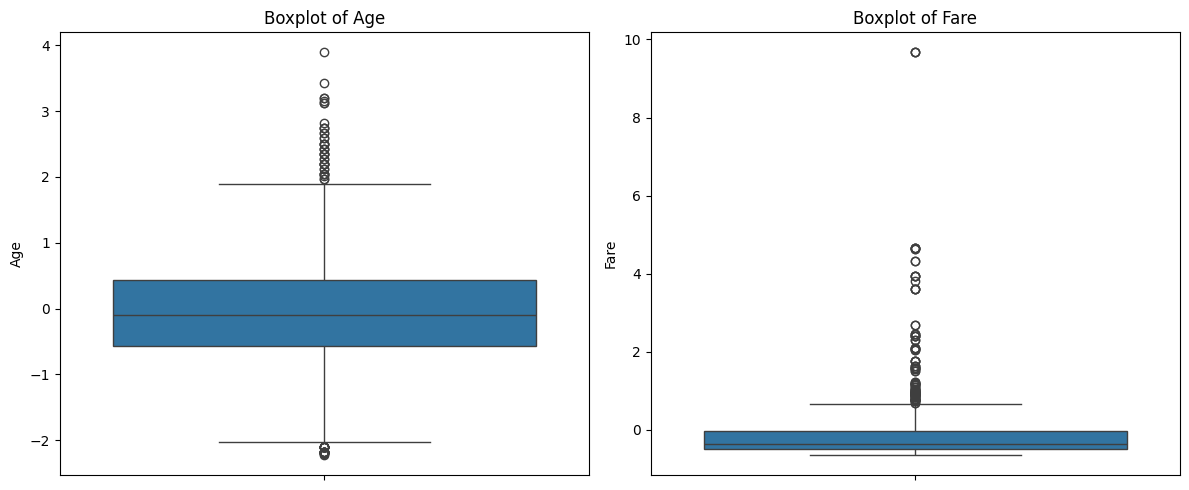

In [34]:
# Step 5: Visualize outliers using boxplots
plt.figure(figsize=(12, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [35]:
# Remove outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Final cleaned data preview
print("\nCleaned Data Preview:")
print(df.head())


Cleaned Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
4                      Allen, Mr. William Henry    0  0.433312      0      0   
5                              Moran, Mr. James    0 -0.104637      0      0   

       Fare  Embarked_Q  Embarked_S  
0 -0.502445       False        True  
2 -0.488854       False        True  
3  0.420730       False        True  
4 -0.486337       False        True  
5 -0.478116        True       False  


In [36]:
# Save cleaned dataset
df.to_csv("Titanic-Cleaned.csv", index=False)

In [37]:
# Visualize the cleaned dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned CSV file
df = pd.read_csv('/content/Titanic-Cleaned.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            3         1       3   
2            4         1       1   
3            5         0       3   
4            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
1                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
2  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
3                      Allen, Mr. William Henry    0  0.433312      0      0   
4                              Moran, Mr. James    0 -0.104637      0      0   

       Fare  Embarked_Q  Embarked_S  
0 -0.502445       False        True  
1 -0.488854       False        True  
2  0.420730       False        True  
3 -0.486337       False        True  
4 -0.478116        True       False  


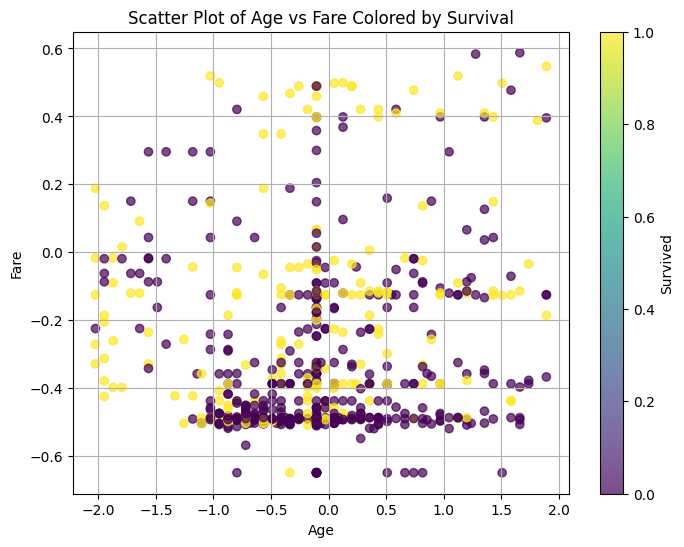

In [41]:
# Graph for cleaned dataset
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='viridis', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare Colored by Survival')
plt.colorbar(scatter, label='Survived')
plt.grid(True)
plt.show()